<a href="https://colab.research.google.com/github/Tejas1415/Cifar10-image-classification-using-MLP-in-TF-backend./blob/master/Keras_CNN_CIFAR10_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist, cifar10
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt
import numpy as np 

# load the data already splits into train and test data sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions
img_x, img_y, channels = 32, 32, 3

keras.backend.set_image_data_format('channels_last')
input_shape = (img_x, img_y, channels)
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, channels)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, channels)

cifar10_labels={
    0: "airplane", 
    1: "automobile", 
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

num_classes = len(cifar10_labels)

# convert class vectors to binary class matrices for categorical_crossentropy loss
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [0]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [0]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 10))

# Converting the images (x_train and x_test) to float32


In [0]:
new_x_train = np.array(x_train, dtype='f')
new_x_test = np.array(x_test, dtype='f')

In [0]:
new_x_train.dtype, new_x_test.dtype

(dtype('float32'), dtype('float32'))

# Scale the pixel values (x_train and x_test) from range 0..255 to 0..1


In [0]:
scaled_x_train = new_x_train / 255.0
scaled_x_test = new_x_test / 255.0

# Model1: Create the CNN architecture provided


In [0]:
#Layer 1
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

#Flatten
model1.add(Flatten())

#Softmax classifier
model1.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


## Display the layers and the size of the outputs. Should match the architecture provided for Model 1.


In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                288010    
Total params: 288,906
Trainable params: 288,906
Non-trainable params: 0
_________________________________________________________________


## Train your model1. You should achieve less than 50% accuracy on the test set.

In [0]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

model1.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.01, decay=1e-6),
                  metrics=['accuracy'])

model1.fit(scaled_x_train, y_train,
              batch_size=128,
              shuffle=True,
              epochs=15,
              validation_data=(scaled_x_test, y_test),
              callbacks=[EarlyStopping(min_delta=0.001, patience=3)])

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 5s 109us/step - loss: 1.9537 - acc: 0.3284 - val_loss: 1.8347 - val_acc: 0.3343
Epoch 2/15
50000/50000 [==============================] - 3s 53us/step - loss: 1.6605 - acc: 0.4122 - val_loss: 1.8757 - val_acc: 0.3683
Epoch 3/15
50000/50000 [==============================] - 3s 53us/step - loss: 1.5759 - acc: 0.4415 - val_loss: 1.6798 - val_acc: 0.3944
Epoch 4/15
50000/50000 [==============================] - 3s 53us/step - loss: 1.5238 - acc: 0.4607 - val_loss: 1.7393 - val_acc: 0.4164
Epoch 5/15
50000/50000 [==============================] - 3s 53us/step - loss: 1.4883 - acc: 0.4762 - val_loss: 1.5483 - val_acc: 0.4588
Epoch 6/15
50000/50000 [==============================] - 3s 53us/step - loss: 1.4415 - acc: 0.4928 - val_loss: 1.5284 - val_acc: 0.4589
Epoch 7/15
50000/50000 [==============================] - 3s 53us/step - loss: 

## Plot your losses and/or accuracy

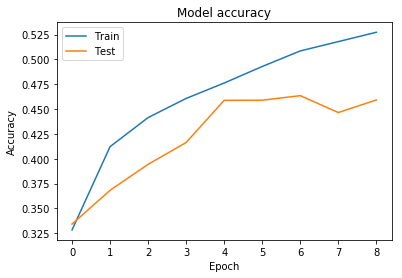

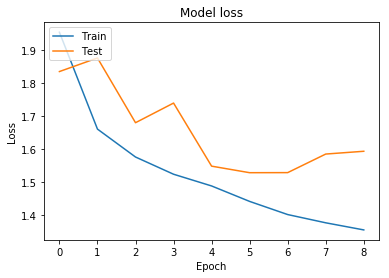

In [0]:
def plot(model):
    # Plot training & validation accuracy values
    plt.plot(model.history.history['acc'])
    plt.plot(model.history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
plot(model1)

# Model 2: Modify the model by adding at least one more layer consisting of convolutions and MaxPooling. 

In [0]:
#Creating the model with one more conv layer, maxpooling 
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#Flatten
model2.add(Flatten())

model2.add(Dense(10, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                125450    
Total params: 144,842
Trainable params: 144,842
Non-trainable params: 0
_________________________________________________________________


## Model2: Training

In [0]:
# Compile the model
model2.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.0001, decay=1e-6),
                  metrics=['accuracy'])
# training
model2.fit(scaled_x_train, y_train,
              batch_size=128,
              shuffle=True,
              epochs=50,
              validation_data=(scaled_x_test, y_test),
              callbacks=[EarlyStopping(min_delta=0.001, patience=3)])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.8711 - acc: 0.3406 - val_loss: 1.6285 - val_acc: 0.4380
Epoch 2/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5658 - acc: 0.4514 - val_loss: 1.4945 - val_acc: 0.4743
Epoch 3/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4536 - acc: 0.4914 - val_loss: 1.4068 - val_acc: 0.5092
Epoch 4/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.3724 - acc: 0.5207 - val_loss: 1.3433 - val_acc: 0.5306
Epoch 5/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.3118 - acc: 0.5443 - val_loss: 1.2864 - val_acc: 0.5566
Epoch 6/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2618 - acc: 0.5623 - val_loss: 1.2470 - val_acc: 0.5696
Epoch 7/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2224 - acc: 0.5782 - val_loss: 1.2177 - val_ac

## Model2: Plot losses and/or accuracy

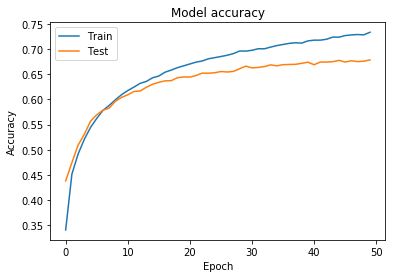

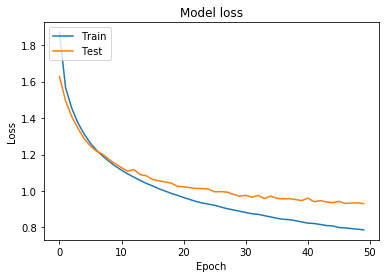

In [0]:
plot(model2)

# Model3: Find the smallest model you can that achieves 99% accuracy or better. 

In [0]:
#Creating the model with one more conv layer, maxpooling 
model3 = Sequential()

model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))


# #Flatten
# model3.add(Flatten())

# model3.add(Dense(10, activation='softmax'))

model3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 128)         147584    
__________

## Model3: training

In [0]:
# Compile the model
model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# training
model3.fit(scaled_x_train, y_train,
              batch_size=128,
              shuffle=True,
              epochs=150,
              validation_data=(scaled_x_test, y_test),
              callbacks=[EarlyStopping(min_delta=0.001, patience=3)])

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
50000/50000 [==============================] - 7s 144us/step - loss: 2.0023 - acc: 0.2486 - val_loss: 1.7467 - val_acc: 0.3638
Epoch 2/150
50000/50000 [==============================] - 6s 128us/step - loss: 1.6703 - acc: 0.3774 - val_loss: 1.5339 - val_acc: 0.4444
Epoch 3/150
50000/50000 [==============================] - 6s 128us/step - loss: 1.5249 - acc: 0.4375 - val_loss: 1.4263 - val_acc: 0.4899
Epoch 4/150
50000/50000 [==============================] - 6s 128us/step - loss: 1.4357 - acc: 0.4745 - val_loss: 1.3414 - val_acc: 0.5242
Epoch 5/150
50000/50000 [==============================] - 6s 128us/step - loss: 1.3694 - acc: 0.5024 - val_loss: 1.2749 - val_acc: 0.5422
Epoch 6/150
50000/50000 [==============================] - 6s 128us/step - loss: 1.3089 - acc: 0.5280 - val_loss: 1.2326 - val_acc: 0.5703
Epoch 7/150
50000/50000 [==============================] - 6s 127us/step - loss: 1.2567 - acc: 0.5474 - val_loss: 1.

## Model3: Plot losses and/or accuracy

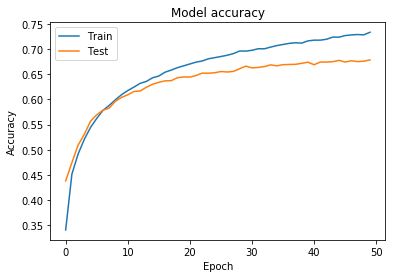

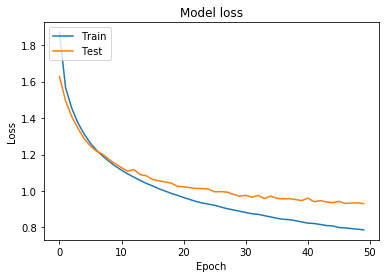

In [0]:
plot(model2)

# Make a prediction on one of the test images. Sample code is below. Modify as needed.


(32, 32, 3)


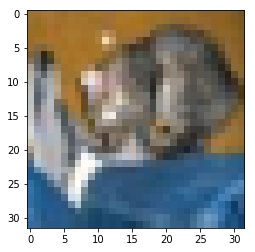

y= [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


img belogs to the following class index: 3


In [0]:

input_image_index = 0
print(x_test[input_image_index,:,:,:].shape)

plt.imshow(x_test[input_image_index,:,:,:])
plt.show()

print("y=", y_test[input_image_index])
print()

predictions = model3.predict_classes(x_test[input_image_index:])[0:10]
# print(predictions)
print()

for i, prediction in enumerate(predictions):
    if i==input_image_index:
      print("img belogs to the following class index:",prediction) 


# TODO: Transfer Learning (VGG16)


In [0]:
# Choose any image classification model you want (ResNEt, MobileNet, VGG, etc) 
# from ny framework (TensorFlow, Keras, etc.). Find wights for it. Retrain it on the Cifar10 dataset. 
# You may have to chanege the finaly kayer to output 10 classes.

# Using VGG16
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(32, 32, 3))



In [0]:
conv_base.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [0]:
from keras.layers import Dropout
from keras.engine import Model

last = conv_base.get_layer('block5_pool').output
# Add classification layers on top of it
x = Flatten()(last)
max
x = Dropout(0.5)(x)
pred = Dense(10, activation='sigmoid')(x)

tl_model = Model(conv_base.input, pred)

for layer in conv_base.layers:
    layer.trainable = False

tl_model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

tl_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [0]:
tl_model.fit(scaled_x_train, y_train,
              batch_size=128,
              shuffle=True,
              epochs=128,
              validation_data=(scaled_x_test, y_test),
              callbacks=[EarlyStopping(min_delta=0.001, patience=3)])

Train on 50000 samples, validate on 10000 samples
Epoch 1/128
50000/50000 [==============================] - 11s 217us/step - loss: 0.3544 - acc: 0.8888 - val_loss: 0.3136 - val_acc: 0.9000
Epoch 2/128
50000/50000 [==============================] - 9s 184us/step - loss: 0.3241 - acc: 0.8999 - val_loss: 0.3041 - val_acc: 0.9000
Epoch 3/128
50000/50000 [==============================] - 9s 185us/step - loss: 0.3140 - acc: 0.8999 - val_loss: 0.2968 - val_acc: 0.9000
Epoch 4/128
50000/50000 [==============================] - 9s 187us/step - loss: 0.3058 - acc: 0.9000 - val_loss: 0.2908 - val_acc: 0.9000
Epoch 5/128
50000/50000 [==============================] - 9s 188us/step - loss: 0.2995 - acc: 0.9001 - val_loss: 0.2857 - val_acc: 0.9000
Epoch 6/128
50000/50000 [==============================] - 9s 187us/step - loss: 0.2945 - acc: 0.9001 - val_loss: 0.2813 - val_acc: 0.9000
Epoch 7/128
50000/50000 [==============================] - 9s 186us/step - loss: 0.2901 - acc: 0.9002 - val_loss: 0

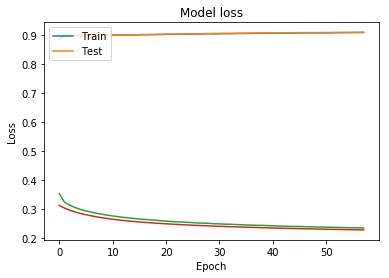

In [0]:
plot(tl_model)